
Suhun Kim (V00952629), Min Kim (V00938382), Soyun Lee (V00904763)

Department of Cumputer Science, University of Victoria


# Motivation
In modern society, where factors such as an aging population, increased isolation, and sedentary lifestyles are prevalent, the availability of immediate assistance during a stroke event may be limited. Eldery individuals living alone without a support system or the decreased social interaction due to the pandemic may contribute to delayed response times in stroke emergencies. Additionally, family medical history plays a significant role in stroke risk assessment, as genetic predispositions can increase the likelihood of stroke occurence. Recognizing the critical importance of time in stroke, the concept of the "golden hour" highlights the significance of prompt intervention for better outcomes. Being able to anticipate the probability of a stroke in advance would prove invaluable inpreventing or minimizing its impact. 

Our project aims to address such challenges by developing a reliable stroke prediction model that takes into account various risk factors and individual characteristics. By integrating data on releveant parameters, our model aims to provide personalized risk assessments. This allows individuals to understand their own susceptibility to stroke and take proactive steps to reduce their risk.

In [452]:
# import modules for ML and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [453]:
# read in data, stroke_prediction_data.csv

stroke_df = pd.read_csv('stroke_prediction_data.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


# Data structure analysis and visualization

The data set has total 12 features. The breakdown for each columns below

id: Unique identifier for each individual.\
gender: Gender of the individual (Male or Female).\
age: Age of the individual.\
hypertension: Whether the individual has hypertension (high blood pressure) (1 if yes, 0 if no).\
heart_disease: Whether the individual has a heart disease (1 if yes, 0 if no).\
ever_married: Whether the individual is married (Yes or No).\
work_type: Type of work the individual is engaged in (e.g., Private, Self-employed, etc.).\
Residence_type: Type of residence of the individual (Urban or Rural).\
avg_glucose_level: Average glucose level in the individual's blood.\
bmi: Body mass index (BMI) of the individual.\
smoking_status: Smoking status of the individual (e.g., never smoked, formerly smoked, unknown).\
stroke: Whether the individual has had a stroke (1 if yes, 0 if no).

Therefore, each row describe a person's medical information.\
For example, the first row shows that a 28-year-old man without hypertension, heart disease or stroke and he's married, lived in Urban area, work private sector and has 79.53 average glucose level and his bmi index is 31.1.

In [454]:
# check for missing values with info() method

stroke_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


Fortunately, the stroke dataset does not contain any null values, so there is no need for an imputer to fill in missing values later on.

In [455]:
# Generate descriptive statistics with describe() method

stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


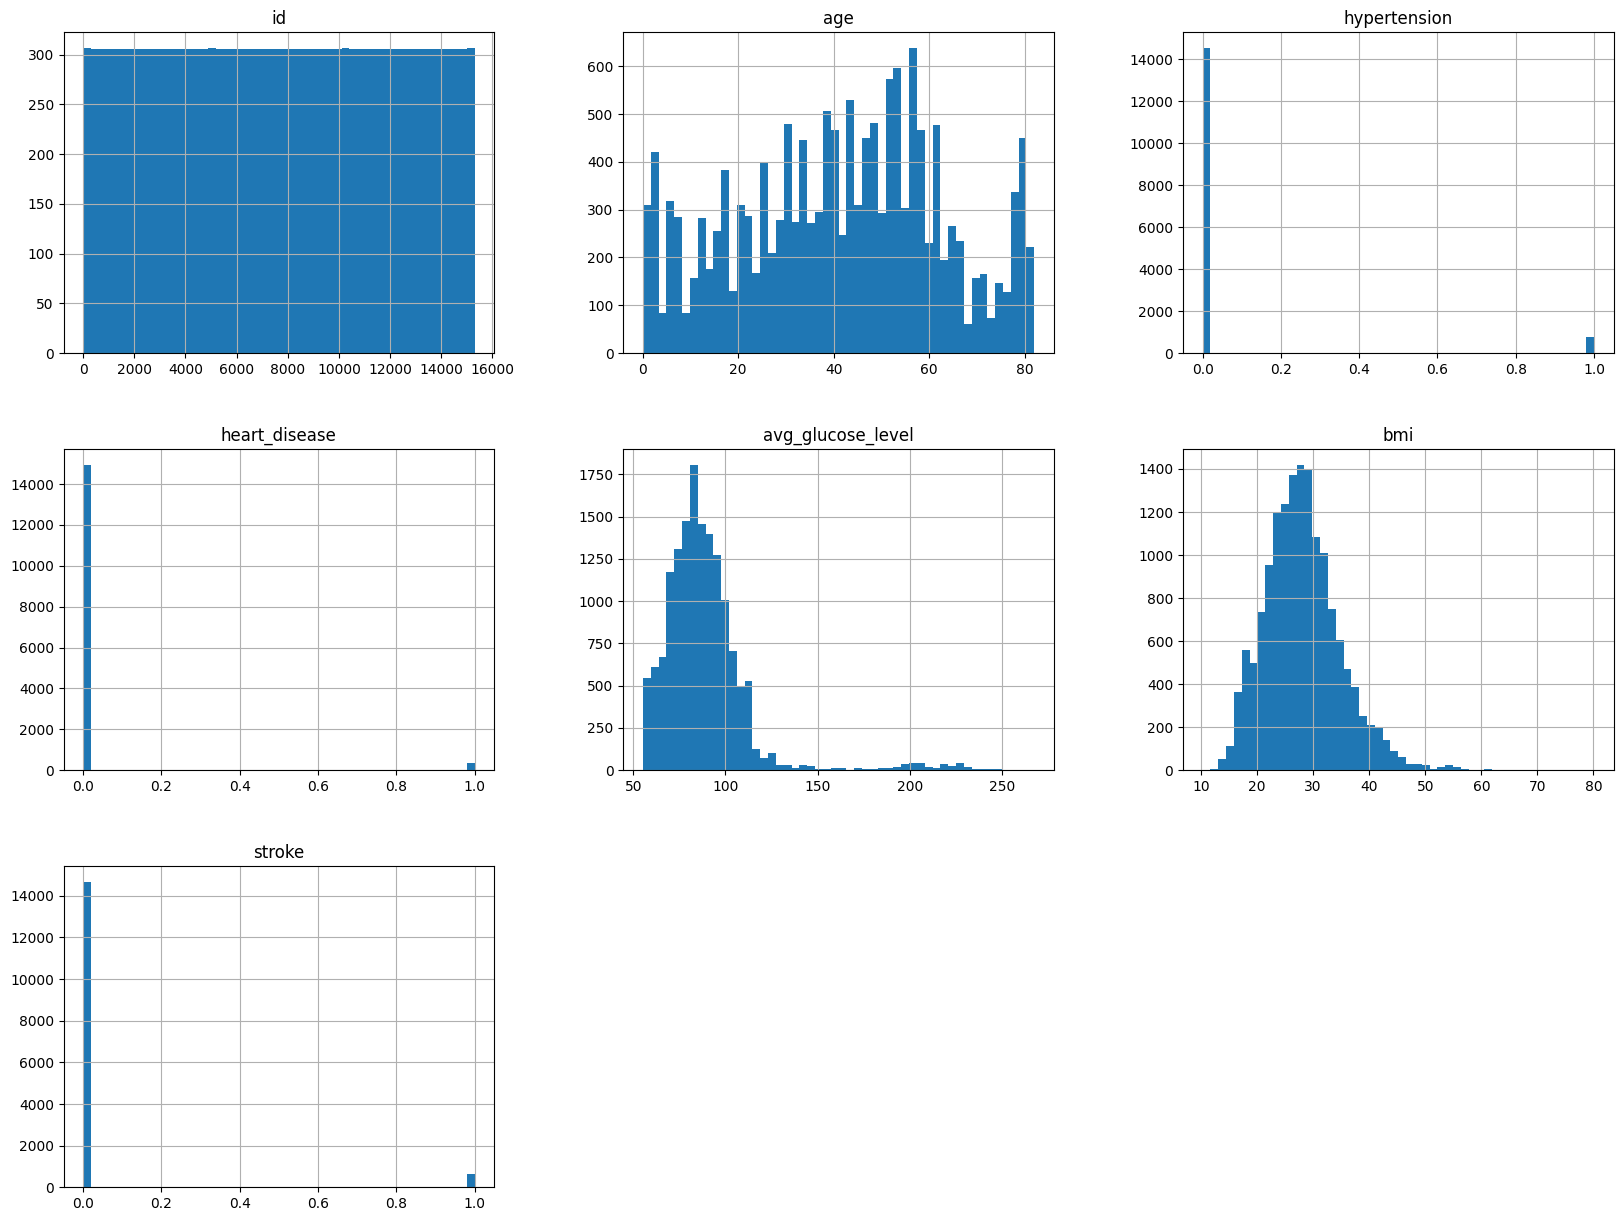

In [456]:
# visulize numerical features of the data with matplotlib

stroke_df.hist(bins=50, figsize=(20,15))
plt.show()

After analyzing the output of the describe method and the charts, several observations can be made regarding the numerical features:

1. Based on the output of the describe method and the charts, it is clear that the BMI and average glucose level exhibit left skewness. Additionally, a significant majority of individuals have an average glucose level below 120. Therefore, these features will need transformation by using suitable methods.
2. Around 4.97% of the total population suffer from hypertension, approximately 2.33% of individuals have a recorded history of heart disease, and 4.13% of people have experienced a stroke.
3. ID column is not necessary for machine learning tasks as it's just an unique identifier, not providing meaningful data for prediction modeling.

In [457]:
# drop id column

stroke_df.drop('id', axis=1, inplace=True)

stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [458]:
# Explore categorical features of the data with value_counts() method

stroke_df.value_counts('smoking_status')

smoking_status
never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
dtype: int64

In [459]:
stroke_df.value_counts('work_type')

work_type
Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
dtype: int64

In [460]:
stroke_df.value_counts('Residence_type')

Residence_type
Rural    7664
Urban    7640
dtype: int64

In [461]:
stroke_df.value_counts('ever_married')

ever_married
Yes    10385
No      4919
dtype: int64

In [462]:
stroke_df.value_counts('gender')

gender
Female    9446
Male      5857
Other        1
dtype: int64

By examining the output of the describe and value_counts methods, we can draw several observations about the categorical features.

1. The Residence_type feature is almost evenly distributed between two categories, namely Rural and Urban.\
2. The ever_married feature consists of two unique values, namely Yes and No. However, the majority of individuals in this column are married.\
3. The gender feature predominantly consists of females (9446) and fewer males represented in the dataset. There's only one record categorized as "Other" gender. \
4. Approximately 40% of individuals responded that they have never smoked, while around 15% of individuals reported currently smoking and another 15% having smoked in the past.\
5. The most prevalent work type is the private sector, with a majority of individuals engaged in this category. Additionally, there is a notable presence of approximately 2000 individuals labeled as "children," suggesting they are below the legal working age. A similar number of individuals are self-employed. A small group of only 42 individuals responded that they have never worked in their life.

Based on the observation, it is decided to drop the row corresponding to the "Other" gender individual. Including this category in the prediction model, for instance, through one-hot encoding, would introduce an additional column and potentially complicate the model. As a result, it may lead to computationally expensive processes or potentially inaccurate results.

In [463]:
# drop other row from gender column as it's too edge case

stroke_df.drop(stroke_df[stroke_df['gender']=='Other'].index, axis=0, inplace=True)

In [464]:
# Double check if row was dropped and new column was added

stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15303 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15303 non-null  object 
 1   age                15303 non-null  float64
 2   hypertension       15303 non-null  int64  
 3   heart_disease      15303 non-null  int64  
 4   ever_married       15303 non-null  object 
 5   work_type          15303 non-null  object 
 6   Residence_type     15303 non-null  object 
 7   avg_glucose_level  15303 non-null  float64
 8   bmi                15303 non-null  float64
 9   smoking_status     15303 non-null  object 
 10  stroke             15303 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.4+ MB


In [465]:
stroke_df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.232624,0.193394,0.108933,0.390630,0.261319
hypertension,0.232624,1.000000,0.074176,0.122838,0.106651,0.145892
heart_disease,0.193394,0.074176,1.000000,0.137151,0.054571,0.111516
avg_glucose_level,0.108933,0.122838,0.137151,1.000000,0.108177,0.149278
bmi,0.390630,0.106651,0.054571,0.108177,1.000000,0.065377
stroke,0.261319,0.145892,0.111516,0.149278,0.065377,1.000000


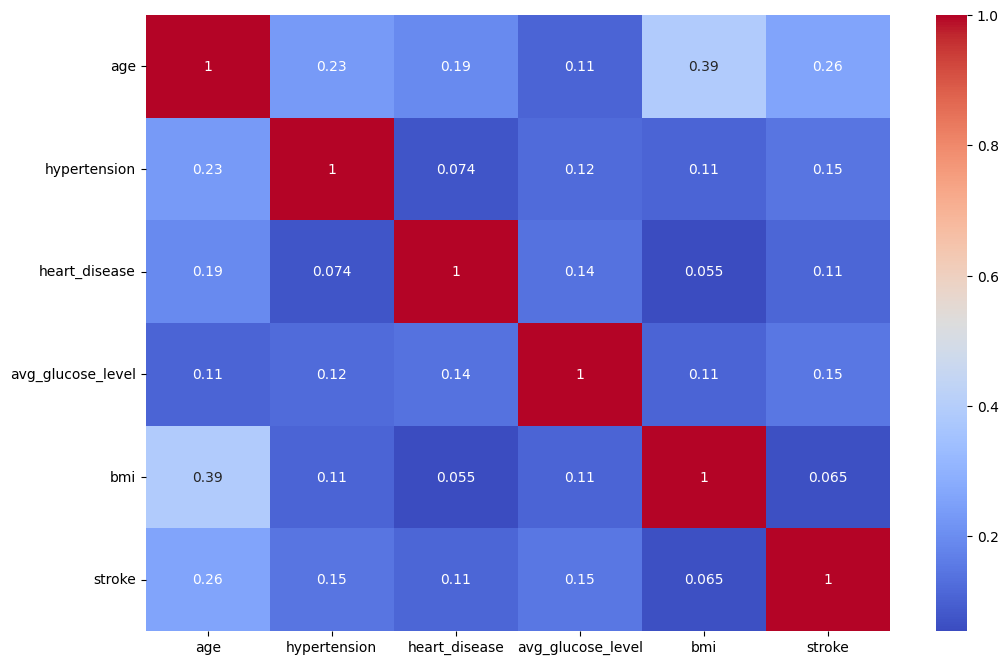

In [466]:
# Visualize correlation matrix with heatmap

plt.figure(figsize=(12,8))
sns.heatmap(stroke_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Based on the visualized correlation matrix, it is observed that hypertension and heart_disease are significant factors contributing to strokes, except age.<br>

However, as previously mentioned, hypertension and heart_disease are binary variables. To highlight the importance of these features and introduce more diversity, it is decided to generate an additional column indicating the presence of either no hypertension or heart disease, only one of them, or both conditions.

In [467]:
# Extra column for hypertension and heart disease in one column.
# hypertension AND heart_disease: 2,  hypertension OR heart_disease: 1,  no hypertension or heart_disease: 0

stroke_df['hypertension_heart_disease'] = stroke_df['hypertension'] + stroke_df['heart_disease']

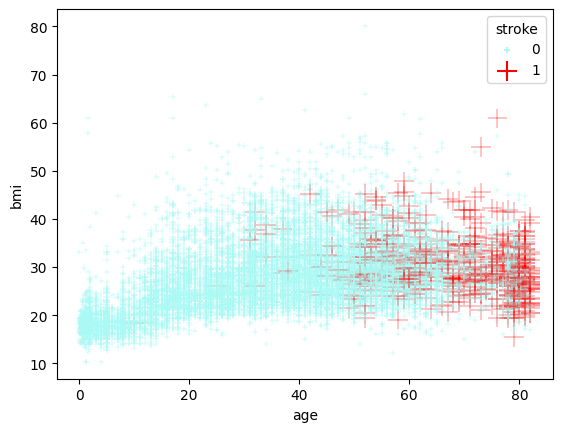

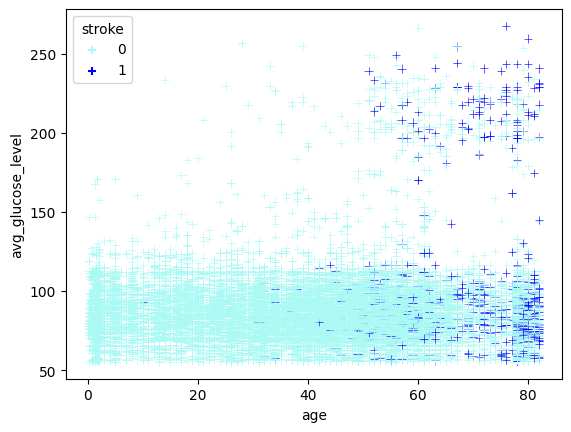

In [468]:
sns.scatterplot(data=stroke_df, x='age', y='bmi', hue='stroke', style="stroke", size="stroke", palette=sns.color_palette(['#aaf9f4', 'red']), alpha=.9, sizes=(200,20), markers="+")
plt.show()
sns.scatterplot(data=stroke_df, x='age', y='avg_glucose_level', style="stroke", hue='stroke', palette=sns.color_palette(['#aaf9f4', 'blue']), alpha=.9, sizes=(200,20), markers="+")
plt.show()

The highest correlation is observed between age and stroke, and there is also a moderate positive correlation between age and BMI. By examining the chart with age on the x-axis and BMI on the y-axis (with the stroke variable indicated by hue), observations below can be made.

The stroke rate dramatically increases for individuals who are over 50 years old. Additionally, for individuals over 50, the BMI does not significantly impact the probability of stroke. However, for individuals under 50 years old, BMI has a more noticeable effect, particularly for those with a BMI over 30.


The correlation of `avg_glucose_level` with other features appears to be relatively consistent. However, when plotted against age and stroke, it becomes evident that avg_glucose_level is distinctly separated into two groups: one below 125 and another above 180. Notably, individuals with glucose levels exceeding 180 are likely to be diagnosed with diabetes. Moreover, the prevalence of diabetes significantly increases in individuals over 50 years old.
Therefore, it can be concluded that individuals who are both over 50 years old and have diabetes are at a higher risk of experiencing a stroke.


Based on these observations, the decision was made to create two additional columns: `age^2 * bmi` and `age^2 * avg_glucose_level`

In [469]:
# additional columns for age^2 * bmi and age^2 * avg_glucose_level if age is over 50

stroke_df['age_bmi'] = 0
stroke_df['age_avg_glucose_level'] = 0

stroke_df.loc[stroke_df['age'] >= 50, ['age_bmi']] = (stroke_df['age'] - 50) ** 2 * stroke_df['bmi']
stroke_df.loc[stroke_df['age'] >= 50, ['age_avg_glucose_level']] = (stroke_df['age'] - 50) ** 2 * stroke_df['avg_glucose_level']

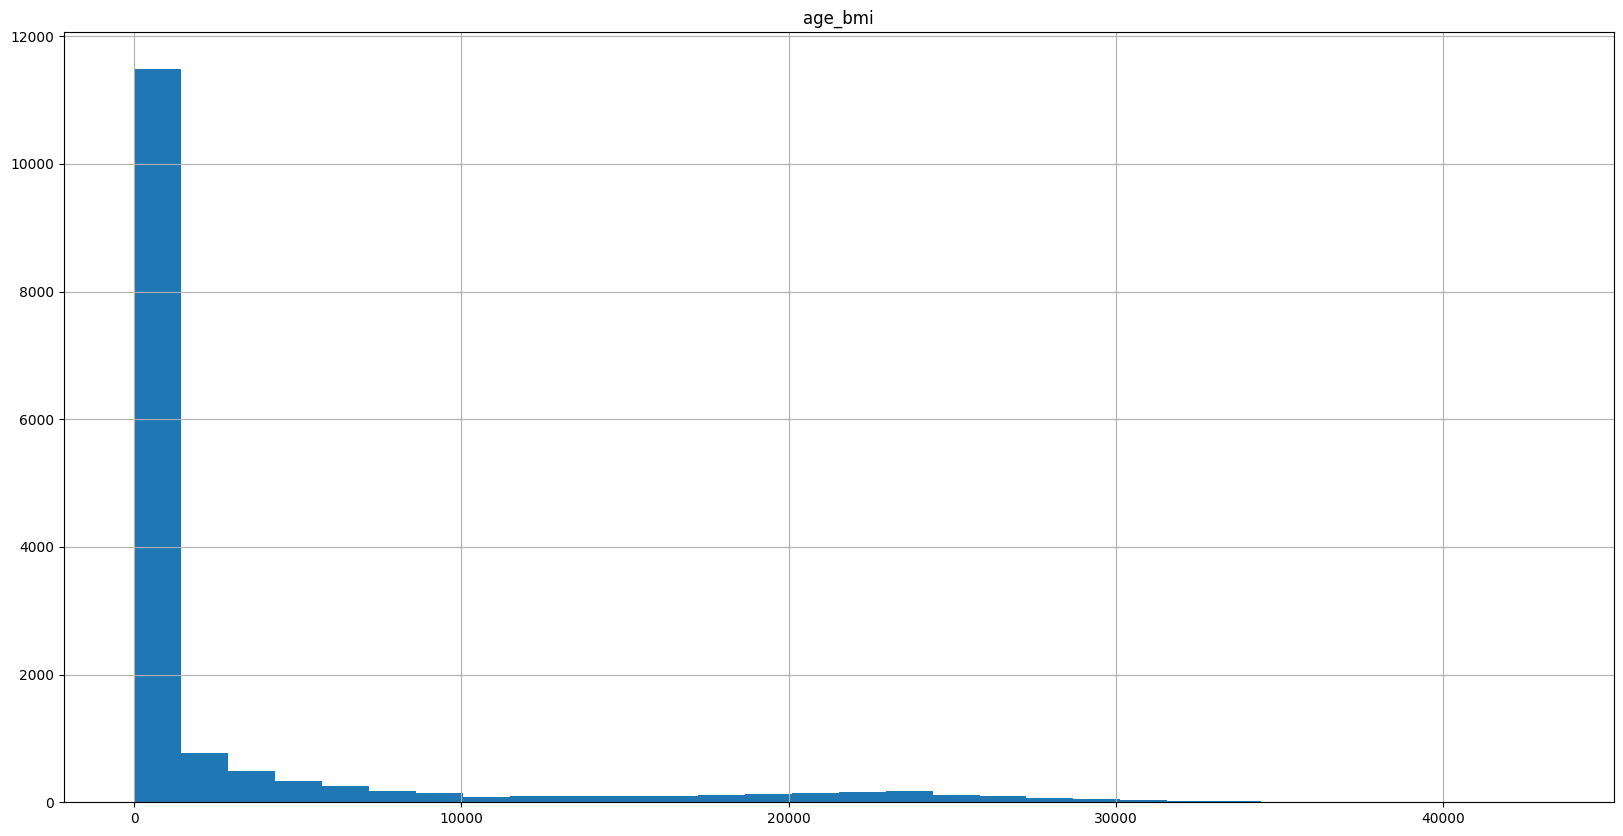

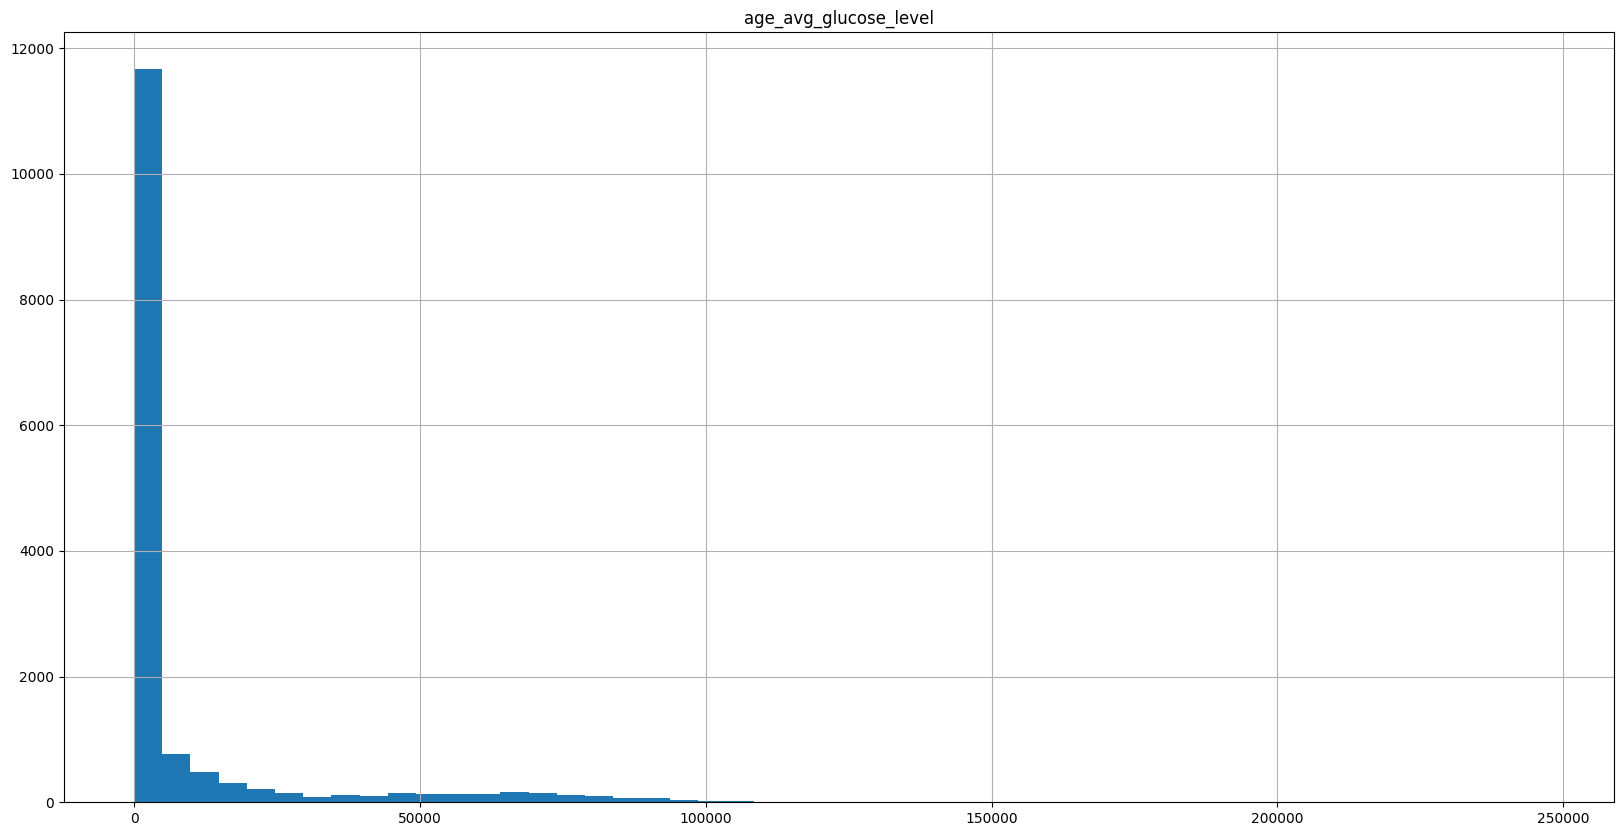

In [470]:
stroke_df[['age_bmi']].hist(bins=30, figsize=(20,10))
stroke_df[['age_avg_glucose_level']].hist(bins=50, figsize=(20,10))

plt.show()

# Data preparation

The previously mentioned histograms make it clear that there is a significant correlation between BMI, average glucose level, and people who are 50 years of age or older. It can now ne divided the data into train and test sets by introducing the newly created column `stroke_df`. Attribute interdependencies are examined while analyzing the trainset data. Notably, the correlation between age and average glucose level is 0.348894, while the correlation between age and BMI level is 0.329024. These results show a definite correlation between these variables.

In [471]:
# split data into train and test sets

from sklearn.model_selection import train_test_split

stroke_train_set, stroke_test_set = train_test_split(stroke_df, test_size=0.2, random_state=42)

stroke_train_set.shape, stroke_test_set.shape

((12242, 14), (3061, 14))

In [472]:
num_attribs = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'age_bmi', 'hypertension_heart_disease', 'age_avg_glucose_level', 'stroke']

stroke_train_set[num_attribs].corr()['stroke'].sort_values(ascending=False)

stroke                        1.000000
age_avg_glucose_level         0.348894
age_bmi                       0.329024
age                           0.259873
hypertension_heart_disease    0.171756
hypertension                  0.150190
avg_glucose_level             0.145506
heart_disease                 0.095446
Name: stroke, dtype: float64

In [473]:
# create a copy of the training set and test set by dropping the target column

stroke_train = stroke_train_set.drop('stroke', axis=1)
stroke_train_labels = stroke_train_set['stroke'].copy()

stroke_test = stroke_test_set.drop('stroke', axis=1)
stroke_test_labels = stroke_test_set['stroke'].copy()

# check the shape of the training set and test set

stroke_train.shape, stroke_test.shape

((12242, 13), (3061, 13))

In [474]:
# create a imputer for numerical attributes
# create a imputer for categorical attributes

from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [475]:
# create a pipeline for categorical attributes

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

cat_attribs = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

cat_encoder = OrdinalEncoder()

cat_pipeline = Pipeline([('cat_encoder', cat_encoder)])

cat_pipeline

Pipeline(steps=[('cat_encoder', OrdinalEncoder())])

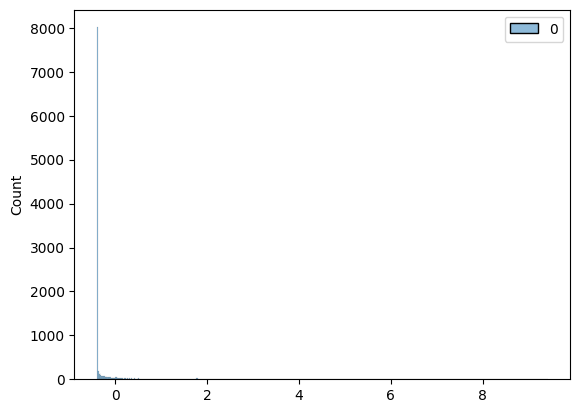

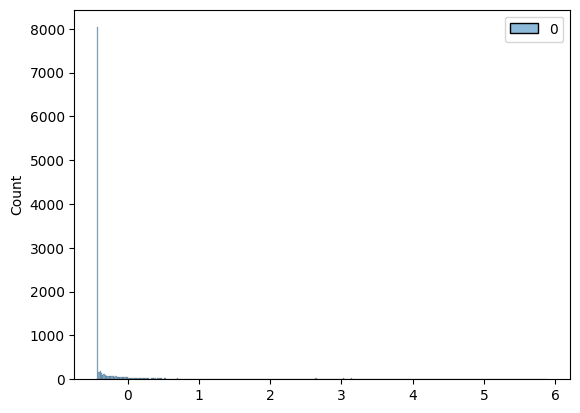

In [476]:
# scale numerical attributes

from sklearn.preprocessing import StandardScaler

num_attribs = ['age_bmi', 'hypertension_heart_disease', 'age_avg_glucose_level']

# create pipeline for numerical attributes

std_scaler = Pipeline([('std_scaler', StandardScaler())])

std_age_avg_glucose_level = std_scaler.fit_transform(stroke_train[['age_avg_glucose_level']])
std_age_bmi = std_scaler.fit_transform(stroke_train[['age_bmi']])

plot = sns.histplot(std_age_avg_glucose_level)
plt.show()

plot = sns.histplot(std_age_bmi)
plt.show()

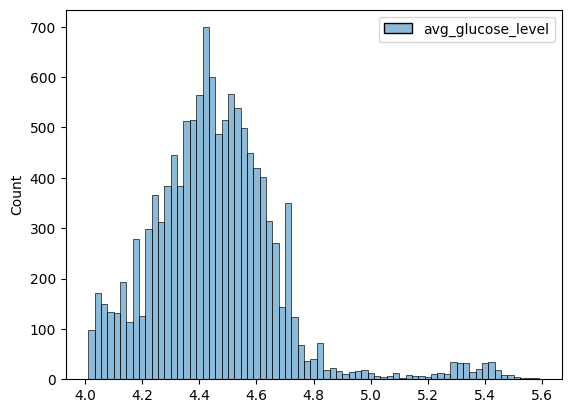

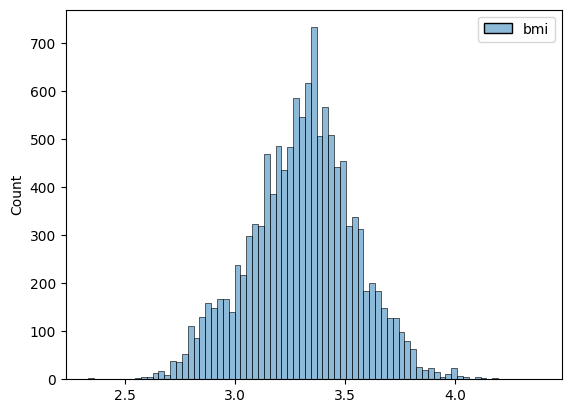

In [477]:
# transform avg_glucose_level and bmi columns with log transformation

from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp, feature_names_out="one-to-one")

log_avg_glucose_level = log_transformer.fit_transform(stroke_train[['avg_glucose_level']])
log_bmi = log_transformer.fit_transform(stroke_train[['bmi']])

plot = sns.histplot(log_avg_glucose_level)
plt.show()

plot = sns.histplot(log_bmi)
plt.show()

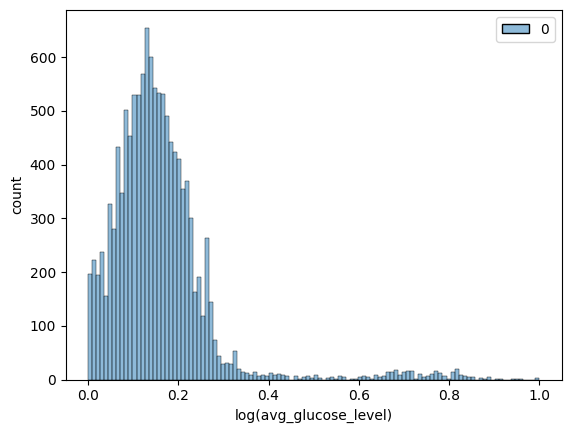

In [478]:
# use minmax scaler to scale numerical attributes

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# make a pipeline for minmax scaler

minmax_transtormer = Pipeline([('minmax_scaler', minmax_scaler)])

log_avg_glucose = minmax_transtormer.fit_transform(stroke_train[["avg_glucose_level"]])

plot = sns.histplot(log_avg_glucose)

plot.set(xlabel='log(avg_glucose_level)', ylabel='count')

plt.show()



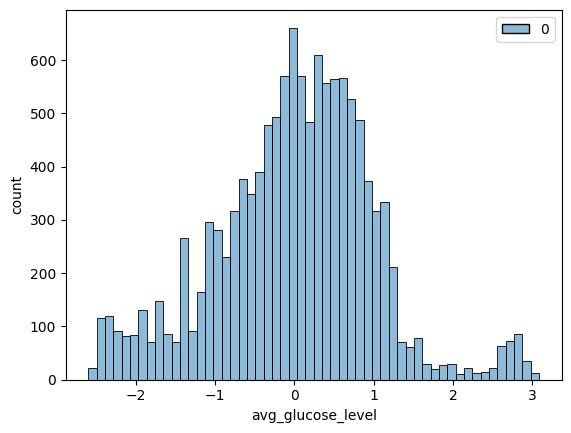

In [479]:
# use power transformation to transform avg_glucose_level

from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer()

power_avg_glucose_level = power_transformer.fit_transform(stroke_train[['avg_glucose_level']])

plot = sns.histplot(power_avg_glucose_level)

plot.set(xlabel='avg_glucose_level', ylabel='count')

plt.show()          

In order to normalize the bmi and avg_glucose_level columns, various methods were applied, such as StandardScaler, logarithm function, MinMaxScaler, and PowerTransformer. The logarithm function was successful in achieving a more balanced distribution for the bmi column, but it did not significantly improve the distribution of the avg_glucose_level column. Similarly, using MinMaxScaler did not yield the desired results.

Finally, PowerTransformer was found to be effective in scaling the data and reducing the tail length of the distributions. However, since it is important to preserve the tail of the distributions in the age_avg_glucose_level and age_bmi columns to maintain their specific characteristics and original meanings, the StandardScaler will be used instead. This approach will ensure that the length of the tail is retained while effectively normalizing the data.


In [480]:
# create a full pipeline for numerical and categorical attributes

from sklearn.compose import ColumnTransformer

num_std_trans_pipeline = Pipeline([('num_imputer', num_imputer),
                                   ('std_scaler', std_scaler)])

num_log_trans_pipeline = Pipeline([('num_imputer', num_imputer),
                                   ('log_transformer', log_transformer)])

num_power_trans_pipeline = Pipeline([('num_imputer', num_imputer),
                                     ('power_transformer', power_transformer)])

num_minmax_trans_pipeline = Pipeline([('num_imputer', num_imputer),
                                      ('minmax_transtormer', minmax_transtormer)])

num_pipeline = Pipeline([('num_imputer', num_imputer)])

cat_pipeline = Pipeline([('cat_imputer', cat_imputer),
                         ('cat_encoder', cat_encoder)])

preprocessing = ColumnTransformer(transformers=[('num_std', num_std_trans_pipeline, ['age']),
                                                ('num_log', num_log_trans_pipeline, ['bmi']),
                                                ('num_power', num_power_trans_pipeline, ['avg_glucose_level', 'age_avg_glucose_level']),
                                                ('num_minmax', num_minmax_trans_pipeline, ['age_bmi', 'age_avg_glucose_level']),
                                                ('num', num_pipeline, ['hypertension', 'heart_disease', 'hypertension_heart_disease']),
                                                ('cat', cat_pipeline, cat_attribs)])

preprocessing

ColumnTransformer(transformers=[('num_std',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]))]),
                                 ['age']),
                                ('num_log',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('log_transformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log'>,
                                                                      in...
                                 ['age_bmi', 'age_avg_glucose_level']),
                                ('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['hypertension', 'heart_disease',
                                  'hypertension_heart_disease']),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OrdinalEncoder())]),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type', 'smoking_status'])])

### Train model and predict on test set

In [481]:
# train a logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

log_reg = make_pipeline(preprocessing, LogisticRegression(random_state=42, max_iter=1000))

log_reg.fit(stroke_train, stroke_train_labels)

predictions = log_reg.predict(stroke_train)

# evaluate the model including confusion matrix

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

print(confusion_matrix(stroke_train_labels, predictions, labels=[True, False]))

print('precision score: ', precision_score(stroke_train_labels, predictions, labels=[True, False]))

print('recall_score: ', recall_score(stroke_train_labels, predictions, labels=[True, False]))

# evaluate on the test set

predictions = log_reg.predict(stroke_test)

print(confusion_matrix(stroke_test_labels, predictions, labels=[True, False]))

print('precision score: ', precision_score(stroke_test_labels, predictions, labels=[True, False]))

print('recall_score: ', recall_score(stroke_test_labels, predictions, labels=[True, False]))


[[   10   488]
 [   11 11733]]
precision score:  0.47619047619047616
recall_score:  0.020080321285140562
[[   3  131]
 [   5 2922]]
precision score:  0.375
recall_score:  0.022388059701492536


In [482]:
# train a random forest model

from sklearn.ensemble import RandomForestClassifier

forest_clf = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))

forest_clf.fit(stroke_train, stroke_train_labels)

predictions = forest_clf.predict(stroke_train)

print(confusion_matrix(stroke_train_labels, predictions, labels=[True, False]))

print('precision score: ', precision_score(stroke_train_labels, predictions, labels=[True, False]))

print('recall_score: ', recall_score(stroke_train_labels, predictions, labels=[True, False]))

# evaluate on the test set

predictions = forest_clf.predict(stroke_test)

print(confusion_matrix(stroke_test_labels, predictions, labels=[True, False]))

print('precision score: ', precision_score(stroke_test_labels, predictions, labels=[True, False]))

print('recall_score: ', recall_score(stroke_test_labels, predictions, labels=[True, False]))

[[  496     2]
 [    0 11744]]
precision score:  1.0
recall_score:  0.9959839357429718
[[   6  128]
 [  15 2912]]
precision score:  0.2857142857142857
recall_score:  0.04477611940298507


In [483]:
# train decision tree model

from sklearn.tree import DecisionTreeClassifier

tree_clf = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42))

tree_clf.fit(stroke_train, stroke_train_labels)

predictions = tree_clf.predict(stroke_train)

print(confusion_matrix(stroke_train_labels, predictions, labels=[True, False]))

print('precision score: ', precision_score(stroke_train_labels, predictions, labels=[True, False]))

print('recall_score: ', recall_score(stroke_train_labels, predictions, labels=[True, False]))

# evaluate on the test set

predictions = tree_clf.predict(stroke_test)

print(confusion_matrix(stroke_test_labels, predictions, labels=[True, False]))

print('precision score: ', precision_score(stroke_test_labels, predictions, labels=[True, False]))

print('recall_score: ', recall_score(stroke_test_labels, predictions, labels=[True, False]))

[[  498     0]
 [    0 11744]]
precision score:  1.0
recall_score:  1.0
[[  21  113]
 [ 111 2816]]
precision score:  0.1590909090909091
recall_score:  0.15671641791044777


Three different training models were applied to the dataset, and the pipeline of each attribute in the trainset was connected. The decision regarding the train models was made in light of the information learned from the SENG474 lecture. The Logistic Regression train model, which combined the Logistic Regression technique with a confusion matrix, was the first one used. The Decision Tree and Random Forest Classifier models used the same methodology.

Since accuracy is primarily used to evaluate the performance of machine learning datasets in the majority of cases discussed during classes and lab sessions, the confusion matrix and visualising the precision and recall scores over accuracy was chosen. However, accuracy is not the only important parameter in the context of our topic, which deals with heart stroke.The main goal is to reduce the confusion matrix's false negative value. Accepting false positives can offer cautionary information about people's health conditions, but doing so risks undermining the project's primary goal of identifying those at risk of suffering a heart stroke. As a result, recall is significant, and the confusion matrix is a useful tool for examining the predictions connected to each value.

Both precision and recall scores for the train dataset and test dataset were low, according to the findings of the Logistic Regression model. On the trainset, the Random Forest Classifier model achieved 100% precision and 99.5984% recall, but on the testset, it only managed 28.5% precision and 4.4776% recall, demonstrating overfitting. Finally, the Decision Tree Classifier model produced the highest recall rate so far, 15.9% and 15.6716%, while overfitting the testset with 100% precision.

In [484]:
# train grid search cv on random forest model

from sklearn.model_selection import GridSearchCV

param_grid = [{'randomforestclassifier__n_estimators': [3, 10, 30], 'randomforestclassifier__max_features': [2, 4, 6, 8]},
                {'randomforestclassifier__bootstrap': [False], 'randomforestclassifier__n_estimators': [3, 10], 'randomforestclassifier__max_features': [2, 3, 4]}]

grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='roc_auc', return_train_score=True)

grid_search.fit(stroke_train, stroke_train_labels)

predictions = grid_search.predict(stroke_train)

print(confusion_matrix(stroke_train_labels, predictions, labels=[True, False]))

print('precision score: ', precision_score(stroke_train_labels, predictions, labels=[True, False]))

print('recall_score: ', recall_score(stroke_train_labels, predictions, labels=[True, False]))

# evaluate on the test set

predictions = grid_search.predict(stroke_test)

print(confusion_matrix(stroke_test_labels, predictions, labels=[True, False]))

print('precision score: ', precision_score(stroke_test_labels, predictions, labels=[True, False]))

print('recall_score: ', recall_score(stroke_test_labels, predictions, labels=[True, False]))

[[  478    20]
 [    0 11744]]
precision score:  1.0
recall_score:  0.9598393574297188
[[   8  126]
 [  25 2902]]
precision score:  0.24242424242424243
recall_score:  0.05970149253731343


In [485]:
# train random search cv on random forest model

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'randomforestclassifier__n_estimators': randint(low=1, high=200),
                    'randomforestclassifier__max_features': randint(low=1, high=8)}

rnd_search = RandomizedSearchCV(forest_clf, param_distributions=param_distribs, n_iter=10, cv=5, scoring='roc_auc', random_state=42)

rnd_search.fit(stroke_train, stroke_train_labels)

predictions = rnd_search.predict(stroke_train)

print(confusion_matrix(stroke_train_labels, predictions, labels=[True, False]))

print('precision score: ', precision_score(stroke_train_labels, predictions, labels=[True, False]))

print('recall_score: ', recall_score(stroke_train_labels, predictions, labels=[True, False]))

# evaluate on the test set

predictions = rnd_search.predict(stroke_test)

print(confusion_matrix(stroke_test_labels, predictions, labels=[True, False]))

print('precision score: ', precision_score(stroke_test_labels, predictions, labels=[True, False]))

print('recall_score: ', recall_score(stroke_test_labels, predictions, labels=[True, False]))

[[  497     1]
 [    0 11744]]
precision score:  1.0
recall_score:  0.9979919678714859
[[   8  126]
 [  13 2914]]
precision score:  0.38095238095238093
recall_score:  0.05970149253731343


Additional models, including GridSearchCV and RandomizedSearchCV, were tested in an effort to improve the results for the fine-tuning procedure. These models were chosen because they can increase generalisation, optimise model performance, and boost the accuracy of predictions. Particularly, RandomizedSearchCV offered GridSearchCV an effective and adaptable substitute.

However, it was found that both models on the train dataset showed overfitting, resulting in a recall score of 5.9701% on the test dataset.

# Additional observation with new external factors: medical information of stroke

To enhance the predictive power of the model, new features were created or existing features were given additional weight based on medical experiment results.

1. A >11-year age difference in stroke incidence was found between smokers and nonsmokers, with a median age of 60.2 years for current smokers and 71.6 years for nonsmokers.$^{[1]}$\
=> weight + 11.4 for 'smokes'. and few number(?) for formerly smoked, calculate median number for weighting number (and add or ignore for unknown)

- never smoked       6281
- Unknown            4543
- formerly smoked    2337
- smokes             2143

2. As we have average glucose level of people, mean value of Fasting Blood Sugar Test and Glucose Tolerance Test used to determine if a person has diebete or not.$^{[2]}$\
(i.e. a person is normal if avg_glucose_level < 120, prediebetes if 120 < avg_glucose_level < 162.5, or diebetes if avg_glucose_level> 162.5)\
Plus, according to American Diebetes Association, chances of having a stroke are 2 times higher if a person is suffering from diebetes.$^{[3]}$\
=> Group people by avg_glucose_level as normal, prediebetes, diebetes. Change column as categorical attributes

3. BMIs of 30 or above were associated with an adjusted relative risk of 2.00 (95% confidence interval [CI], 1.48-2.71) for overall stroke compared to persons with BMIs of less than 23. $^{[4]}$\
=> Therefore, rather than using a numerical value, we can divide into three distinct groups. The first group is made up of people with BMIs under 23, followed by those with BMIs between 23 and 29, and those with BMIs beyond 30.

In [486]:
# Add 11.4 to age column if a smoking status is 'smokes' or 'formerly smoked'

stroke_train.loc[stroke_train['smoking_status'] == 'smokes', 'age'] += 11.4
stroke_train.loc[stroke_train['smoking_status'] == 'formerly smokes', 'age'] += 11.4 / 2

stroke_test.loc[stroke_test['smoking_status'] == 'smokes', 'age'] += 11.4
stroke_test.loc[stroke_test['smoking_status'] == 'formerly smokes', 'age'] += 11.4 / 2

In [487]:
# if avg_glucose_level < 120, prediebetes if 120 <= avg_glucose_level < 162.5, or diebetes if avg_glucose_level> 162.5
# Group people by avg_glucose_level as normal, prediebetes, diebetes. Change column as categorical attributes

stroke_train.loc[stroke_train['avg_glucose_level'] < 120, 'avg_glucose_level_str'] = 'normal'
stroke_train.loc[(stroke_train['avg_glucose_level'] >= 120) & (stroke_train['avg_glucose_level'] < 162.5), 'avg_glucose_level_str'] = 'prediebetes'
stroke_train.loc[stroke_train['avg_glucose_level'] >= 162.5, 'avg_glucose_level_str'] = 'diebetes'

stroke_test.loc[stroke_test['avg_glucose_level'] < 120, 'avg_glucose_level_str'] = 'normal'
stroke_test.loc[(stroke_test['avg_glucose_level'] >= 120) & (stroke_test['avg_glucose_level'] < 162.5), 'avg_glucose_level_str'] = 'prediebetes'
stroke_test.loc[stroke_test['avg_glucose_level'] >= 162.5, 'avg_glucose_level_str'] = 'diebetes'

In [488]:
# if bmi < 23, normal, if 23 =< bmi < 30, overweight, if bmi >= 30, obese

stroke_train.loc[stroke_train['bmi'] < 23, 'bmi_str'] = 'normal'
stroke_train.loc[(stroke_train['bmi'] >= 23) & (stroke_train['bmi'] < 30), 'bmi_str'] = 'overweight'
stroke_train.loc[stroke_train['bmi'] >= 30, 'bmi_str'] = 'obese'

stroke_test.loc[stroke_test['bmi'] < 23, 'bmi_str'] = 'normal'
stroke_test.loc[(stroke_test['bmi'] >= 23) & (stroke_test['bmi'] < 30), 'bmi_str'] = 'overweight'
stroke_test.loc[stroke_test['bmi'] >= 30, 'bmi_str'] = 'obese'

In [489]:
stroke_train.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,hypertension_heart_disease,age_bmi,age_avg_glucose_level,avg_glucose_level_str,bmi_str
8304,Male,45.0,0,0,Yes,Govt_job,Urban,92.23,32.0,Unknown,0,0.0,0.00,normal,obese
10732,Male,62.0,0,0,Yes,Private,Rural,93.88,43.3,Unknown,0,6235.2,13518.72,normal,obese
7015,Female,11.0,0,0,No,children,Urban,88.19,15.5,never smoked,0,0.0,0.00,normal,normal
12543,Male,56.0,0,0,Yes,Govt_job,Urban,88.81,33.5,never smoked,0,1206.0,3197.16,normal,obese
2455,Male,8.0,0,0,No,children,Urban,90.22,18.8,Unknown,0,0.0,0.00,normal,normal
1595,Female,46.0,0,0,Yes,Private,Urban,111.94,25.6,never smoked,0,0.0,0.00,normal,overweight
10218,Female,35.0,0,0,Yes,Private,Urban,77.12,24.5,never smoked,0,0.0,0.00,normal,overweight
13294,Female,22.0,0,0,No,Private,Rural,102.05,21.7,never smoked,0,0.0,0.00,normal,normal
8278,Male,38.0,0,0,Yes,Private,Rural,73.78,24.1,Unknown,0,0.0,0.00,normal,overweight
9939,Female,63.0,0,0,Yes,Self-employed,Rural,99.96,28.4,never smoked,0,4799.6,16893.24,normal,overweight


In [490]:
# drop smoking_status, avg_glucose_level, bmi

stroke_train.drop(['smoking_status', 'avg_glucose_level', 'bmi'], axis=1, inplace=True)
stroke_test.drop(['smoking_status', 'avg_glucose_level', 'bmi'], axis=1, inplace=True)

stroke_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12242 entries, 8304 to 7270
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      12242 non-null  object 
 1   age                         12242 non-null  float64
 2   hypertension                12242 non-null  int64  
 3   heart_disease               12242 non-null  int64  
 4   ever_married                12242 non-null  object 
 5   work_type                   12242 non-null  object 
 6   Residence_type              12242 non-null  object 
 7   hypertension_heart_disease  12242 non-null  int64  
 8   age_bmi                     12242 non-null  float64
 9   age_avg_glucose_level       12242 non-null  float64
 10  avg_glucose_level_str       12242 non-null  object 
 11  bmi_str                     12242 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.2+ MB


In [491]:
# create new preprocessing pipeline

cat_attribs = ['gender', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level_str', 'bmi_str']

new_reprocessing = ColumnTransformer(transformers=[('age', num_std_trans_pipeline, ['age']),
                                                   ('num', num_pipeline, ['hypertension', 'heart_disease', 'hypertension_heart_disease']),
                                                   ('cat', cat_pipeline, cat_attribs)])

stroke_train_prepared = new_reprocessing.fit_transform(stroke_train)

df_stroke_train_prepared = pd.DataFrame(stroke_train_prepared, columns=new_reprocessing.get_feature_names_out())

df_stroke_train_prepared.head()

,age__age,num__hypertension,num__heart_disease,num__hypertension_heart_disease,cat__gender,cat__ever_married,cat__work_type,cat__Residence_type,cat__avg_glucose_level_str,cat__bmi_str
0,0.091335,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,0.860056,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0
2,-1.446107,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0
3,0.588743,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,-1.581764,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,0.0


In [492]:
# train a random forest model

from sklearn.ensemble import RandomForestClassifier

forest_clf = make_pipeline(new_reprocessing, RandomForestClassifier(random_state=42))

forest_clf.fit(stroke_train, stroke_train_labels)

predictions = forest_clf.predict(stroke_train)

print(confusion_matrix(stroke_train_labels, predictions, labels=[True, False]))

print('precision score: ', precision_score(stroke_train_labels, predictions, labels=[True, False]))

print('recall_score: ', recall_score(stroke_train_labels, predictions, labels=[True, False]))

# evaluate on the test set

predictions = forest_clf.predict(stroke_test)

print(confusion_matrix(stroke_test_labels, predictions, labels=[True, False]))

print('precision score: ', precision_score(stroke_test_labels, predictions, labels=[True, False]))

print('recall_score: ', recall_score(stroke_test_labels, predictions, labels=[True, False]))

[[  270   228]
 [   23 11721]]
precision score:  0.9215017064846417
recall_score:  0.5421686746987951
[[  15  119]
 [  43 2884]]
precision score:  0.25862068965517243
recall_score:  0.11194029850746269


In [493]:
# train decision tree model

from sklearn.tree import DecisionTreeClassifier

tree_clf = make_pipeline(new_reprocessing, DecisionTreeClassifier(random_state=42))

tree_clf.fit(stroke_train, stroke_train_labels)

predictions = tree_clf.predict(stroke_train)

print(confusion_matrix(stroke_train_labels, predictions, labels=[True, False]))

print('precision score: ', precision_score(stroke_train_labels, predictions, labels=[True, False]))

print('recall_score: ', recall_score(stroke_train_labels, predictions, labels=[True, False]))

# evaluate on the test set

predictions = tree_clf.predict(stroke_test)

print(confusion_matrix(stroke_test_labels, predictions, labels=[True, False]))

print('precision score: ', precision_score(stroke_test_labels, predictions, labels=[True, False]))

print('recall_score: ', recall_score(stroke_test_labels, predictions, labels=[True, False]))

[[  257   241]
 [   10 11734]]
precision score:  0.9625468164794008
recall_score:  0.5160642570281124
[[  18  116]
 [  67 2860]]
precision score:  0.21176470588235294
recall_score:  0.13432835820895522


- Comparison for `random forest classifier`:\
The previous random forest classifier model demonstrated outstanding performance on the train set, achieving a precision score of 100% and a recall score of 99.598%. However, its performance on the test set was significantly poorer, with a precision score of 28.57% and a recall score of 4.5%. This suggests that the model overfit the training data and struggled to generalize to new, unseen data.\
In contrast, a new model incorporating additional medical knowledge exhibited slightly inferior performance on the train set, particularly with a notable drop in recall score by over 40%, while experiencing only a slight decrease in precision. However, this new model showed improved performance on the test set, particularly in terms of recall, which increased from approximately 4.5% to 11.19%, while the precision score slightly decreased.\
Overall, the new model demonstrated better generalization ability by achieving higher recall on the test set compared to the previous model. Although it experienced a slight decline in precision, the improved recall indicates that it successfully identified more positive cases correctly. Further model optimization and fine-tuning could potentially enhance the overall performance of the new model on both the train and test sets.

- Comparison for `decision tree classifier`:\
The previous decision tree classifier model achieved perfect performance on the train set, similar to the random forest model, with 100% precision and recall. Not surprisingly, its performance also declined dramatically on the test set. The precision and recall values on the test set are only 15.9% and 15.6%, respectively. Similar to random forest classifier model, it can be confirmed that this classifier also was overfitted on train set.\
The new decision tree classifier model maintained a high precision of 96.25% and a recall of 51.6% on the train set. However, similar to the previous models, its performance dropped on the test set, with a precision of 21.18% and a recall of 13.4%.

Both classifiers demonstrated a pattern of overfitting on the train set, regardless of whether they were simple machine learning models or adjusted models with medical knowledge. Interestingly, the precision scores slightly decreased compared to the previous models, while the recall scores were significantly reduced for the train set. The precision scores for the test set did not undergo significant changes. On the contrary, the random forest classifier which doubled its recall score, while the decision tree classifier's recall score dropped.

# Result

During the initial modeling phase, it was observed that all the classifiers achieved high accuracy on the training data but struggled to generalize to new data. This phenomenon, known as overfitting, occurs when models become too specific to the training data and fail to perform well on unseen examples. To emphasize improving the recall values, which measure the ability to correctly identify positive cases, extensive research was conducted by investigating few studies and scientific papers for potential insights. However, the complexity of the human body posed challenges, and the incorporation of new factors did not yield the significant improvements anticipated. The introduction of these additional factors resulted in a decline in recall scores on the training data, further complicating the modeling process.

Despite not meeting the expected results initially, this experience has provided valuable insights into the complexities of creating accurate prediction models for medical situations. As we move forward, it will be needed to explore different approaches and utilize the expertise in the field to tackle these challenges and improve the overall performance of the models.

# Limitation and Suggestion for future study

Despite studying articles and adding new functions for each attribute, the precision and recall rates remained low and were deemed unsatisfactory. However, it soon became clear that it is a difficult task to predict heart strokes using the attribute data in the dataset. Expanding the body data on individuals is required to identify genetic factors, which requires different classifications and datasets for different types of strokes. This includes details on lifestyle elements like diet quality, exercise frequency, and hormone levels like leptin, cortisol, and ghrelin, as well as genetic aspects like MC4R,POMC and cholesterol levels.

The current machine learning recall rates and precision serve as a starting point that needs to be enhanced for future studies. To advance medical research using a variety of datasets, collaboration with medical professionals and doctors is crucial. This project's goal was to give a group of students a chance to use the knowledge they had learned throughout the semester. Despite the unsatisfactory recall and precision rates, it is hoped that this research will spark interest among others and advance knowledge of heart stroke, ultimately protecting the welfare of our loved ones.

# Reference

[1] H.-K. Wang et al., “Smoking paradox in stroke survivors? - aha/ASA journals,” Smoking Paradox in Stroke Survivors?, https://www.ahajournals.org/doi/pdf/10.1161/STROKEAHA.119.027012 (accessed Jun. 30, 2023).

[2] “Diabetes tests,” Centers for Disease Control and Prevention, https://www.cdc.gov/diabetes/basics/getting-tested.html (accessed Jun. 30, 2023). 

[3] “Stroke,” Stroke | ADA, https://diabetes.org/diabetes/stroke#:~:text=If%20you%20have%20diabetes%2C%20your,risk%20of%20getting%20a%20stroke (accessed Jun. 30, 2023).

[4] M. Tobias Kurth, “Body mass index and the risk of stroke in men,” Archives of Internal Medicine, https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/754810 (accessed Jun. 30, 2023).